We want to assess how many emoticons and emojis are there in the samsum  dataset.

In [1]:
!pip install datasets
!pip install emoji
from datasets import load_dataset
import emoji
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 397.5/397.5 kB 2.8 MB/s eta 0:00:00


mapping of emoticons to emojis

In [2]:
# define a mapping
emoji_mapping = {
    ':)': '😀',
    ':-)': '😀',
    ':(': '😞',
    ':-(': '😞',
    ':-/': '🫤',
    '<3': '❤️',
    'XD': '😆',
    'xD': '😆',
    'xd': '😆',
    ':D': '😄',
    ':O': '😲',
    ';)': '😉',
    ':P': '😜',
    '>:(': '😠',
    ':-*': '😘',
    ':*': '😘',
    'B)': '😎',
    '>:D': '😈',
    'O:)': '😇',
    ':|': '😐',
    ':S': '😖',
    ':X': '😶',
    '<(")': '🐦',
    '>:O': '😱',
    '\\o/': '🙌',
    '(^_^)/': '🌟',
    '(o_o)/': '🌜',
    '<>_<>': '🎮',
    '(>_<)': '😣',
    '(^_-)': '😄',
    '(^_^)b': '👍',
    '(~_^)': '😂',
    ':-D': '😁',
    ':|)': '😐',
    '>:)': '😏',
}

In [27]:
def contains_emoticon_emoji(text):
  emojis = extract_emojis(text)
  to_update = []
  for emoticon, _ in emoji_mapping.items():
    if emoticon in text:
      to_update.append(emoticon)
  if emojis!=[]:
    for emoji in emojis:
      to_update.append(emoji)

  return to_update

def extract_emojis(text):
  return [char for char in text if char in emoji.EMOJI_DATA]

def emojis_and_emoticons(partition):
  """Counts the amonut of dialogues containing at least one emoticon or emoji in the specified samsum partition.

  Args:
      partition: supported "train", "validation", "test".

  Returns:
      nothing, it just prints and plots the emoticon/emoji occurrences
  """
  dataset = load_dataset("samsum")[partition]["dialogue"] # train, validation, test
  map_emoji_to_count = {}
  count=0
  n_e = 0
  for dialogue in dataset:
    to_update = contains_emoticon_emoji(dialogue)
    if to_update!=[]:
      count += 1
      for e in to_update:
        map_emoji_to_count[e] = map_emoji_to_count.get(e,0) + 1
        n_e += 1

  print(f"{count} dialogues with at least one emoticon or emoji were found, corresponding to the {round(count/len(dataset) * 100, 2)} % of the {partition} dialogues.")
  print(f"There's a total of {n_e} emojis/emoticons.")

  print("emoticon/emoji   : occurrences")
  map_emoji_to_count = sorted(map_emoji_to_count.items(), key=lambda x: x[1], reverse=True)
  emojis=[]
  count_array=[]
  for key, value in map_emoji_to_count:
    emojis.append(key)
    count_array.append(value)
    print(f"{key}   : {value}")

  plt.bar(emojis[:20], count_array[:20])
  plt.title(f'Occurrences of the first 20 emojis / emoticons in samsum {partition}')
  plt.show()

7113 dialogues with at least one emoticon or emoji were found, corresponding to the 48.28 % of the train dialogues.
There's a total of 14455 emojis/emoticons.
emoticon/emoji   : occurrences
:)   : 2513
:D   : 1727
;)   : 1232
:(   : 867
:P   : 723
<3   : 591
😂   : 558
:*   : 389
xD   : 356
XD   : 355
:-)   : 270
😊   : 267
😍   : 222
xd   : 192
😉   : 164
👍   : 146
😘   : 138
❤   : 125
😜   : 123
🙂   : 123
🤣   : 113
:-(   : 110
😁   : 105
😀   : 104
:O   : 101
:-D   : 96
😎   : 72
😃   : 65
😱   : 64
:-/   : 62
👏   : 62
😭   : 56
😅   : 56
🙄   : 56
☺   : 48
☹   : 47
😄   : 46
🤗   : 45
😕   : 43
🎉   : 42
😩   : 40
😻   : 40
😙   : 40
😔   : 36
🙌   : 35
😆   : 35
👌   : 34
🙈   : 33
😢   : 33
😡   : 33
🏻   : 32
😠   : 29
🙏   : 28
😏   : 28
😒   : 28
😮   : 28
♀   : 27
💪   : 26
😋   : 26
😛   : 26
😳   : 24
🤔   : 24
😴   : 23
😝   : 22
😞   : 21
🤦   : 20
😟   : 20
✨   : 20
😲   : 20
🏼   : 19
✌   : 19
😓   : 19
👋   : 19
😹   : 18
🤞   : 18
♂   : 17
🍾   : 17
🍸   : 17
😫   : 16
😰   : 16
🤩   : 16
😚   : 16
💩   : 16
😨   : 15
🔥   : 1

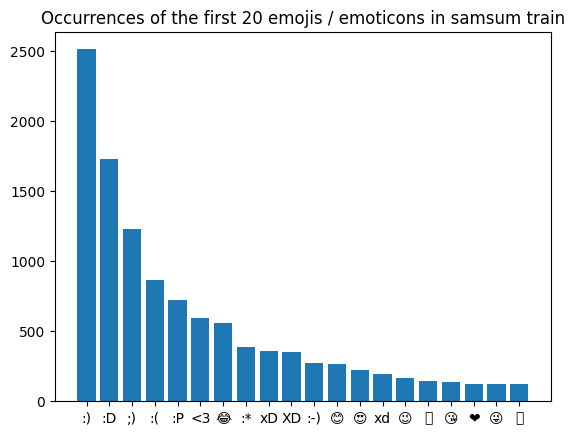

In [29]:
emojis_and_emoticons('train')

395 dialogues with at least one emoticon or emoji were found, corresponding to the 48.29 % of the validation dialogues.
There's a total of 744 emojis/emoticons.
emoticon/emoji   : occurrences
:)   : 139
:D   : 83
;)   : 63
:(   : 56
:P   : 41
<3   : 28
:*   : 22
😂   : 17
xD   : 16
XD   : 15
😊   : 14
🤣   : 14
:-)   : 13
xd   : 12
😜   : 10
👍   : 9
😁   : 8
😉   : 8
😭   : 7
😘   : 6
😀   : 5
🍩   : 5
:-/   : 5
:O   : 5
👏   : 5
:-(   : 5
😇   : 5
💪   : 4
🥕   : 4
😎   : 4
☺   : 4
😍   : 4
😕   : 4
🙂   : 4
😃   : 3
😒   : 3
😄   : 3
❤   : 3
🤬   : 3
😢   : 3
😅   : 3
:-D   : 3
🙉   : 3
😆   : 3
😗   : 3
😚   : 3
🍺   : 3
🙃   : 2
🤔   : 2
😝   : 2
>:(   : 2
🙈   : 2
😏   : 2
😈   : 2
🙏   : 2
☹   : 2
🤷   : 2
♂   : 2
🌈   : 2
🙄   : 1
😪   : 1
🤓   : 1
💕   : 1
😨   : 1
😰   : 1
😑   : 1
🤝   : 1
😠   : 1
💖   : 1
💋   : 1
😞   : 1
😬   : 1
:-*   : 1
😣   : 1
🔥   : 1
💜   : 1
😫   : 1
👌   : 1
😋   : 1
💗   : 1
🏻   : 1
☝   : 1
😼   : 1
🙌   : 1
😩   : 1
😹   : 1
🎂   : 1
💩   : 1
🎵   : 1
😱   : 1
🌟   : 1
💙   : 1
🤗   : 1
😐   : 1
🍀   : 1
😛   : 1


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129315 (\N{ROLLING ON THE FLOOR LAUGHING}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


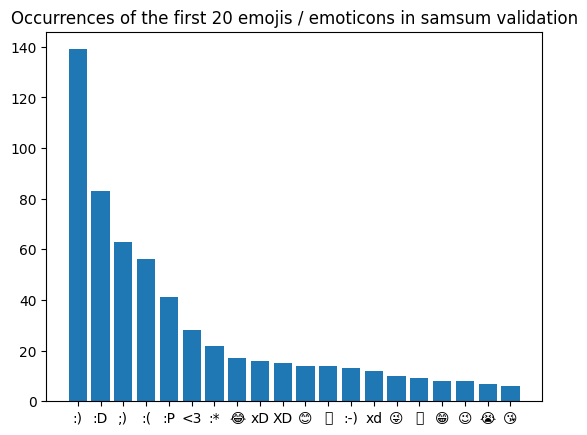

In [30]:
emojis_and_emoticons('validation')

403 dialogues with at least one emoticon or emoji were found, corresponding to the 49.21 % of the test dialogues.
There's a total of 838 emojis/emoticons.
emoticon/emoji   : occurrences
:)   : 135
:D   : 94
;)   : 69
:(   : 61
😂   : 49
:P   : 45
<3   : 33
:*   : 27
XD   : 22
xD   : 21
:-)   : 17
😉   : 15
😃   : 13
❤   : 11
🙂   : 9
😊   : 9
😱   : 8
😍   : 8
:O   : 8
😁   : 8
👩   : 8
:-(   : 7
😀   : 7
😢   : 7
😑   : 7
😝   : 7
:-D   : 6
😆   : 6
xd   : 5
🤣   : 5
😩   : 5
:-/   : 4
:-*   : 4
😘   : 4
😶   : 4
🥶   : 4
💋   : 4
😋   : 3
💜   : 3
🎄   : 3
😏   : 3
🤭   : 3
💣   : 3
⚽   : 3
😕   : 3
😭   : 3
🦊   : 3
(^_-)   : 2
🙈   : 2
😇   : 2
👍   : 2
😣   : 2
🐶   : 2
😔   : 2
🎉   : 2
>:(   : 2
💪   : 2
🙁   : 2
🙊   : 1
🙉   : 1
😎   : 1
:X   : 1
😅   : 1
🤙   : 1
B)   : 1
😡   : 1
🤞   : 1
🤩   : 1
:|   : 1
👌   : 1
👼   : 1
💩   : 1
💓   : 1
😜   : 1
😓   : 1
👋   : 1
😻   : 1
😹   : 1
😫   : 1
🙄   : 1
😲   : 1
😟   : 1
😚   : 1
🐬   : 1
🐰   : 1
🎩   : 1
😒   : 1
🙏   : 1


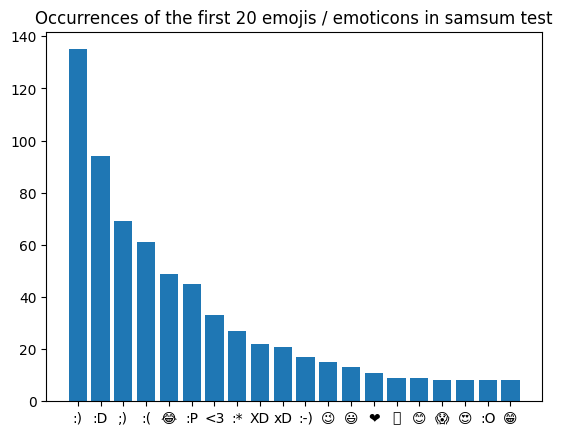

In [31]:
emojis_and_emoticons('test')